In [29]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
data_file="C:\\Users\\hp\Downloads\\MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']


In [31]:
data=pd.DataFrame(X)

In [32]:
data['label'] = y

In [33]:
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [34]:
data = np.array(data)
m,n=data.shape

data_dev = data[0:1000].T
Y_dev = data_dev[784]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[784]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [35]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding label

Label:  7


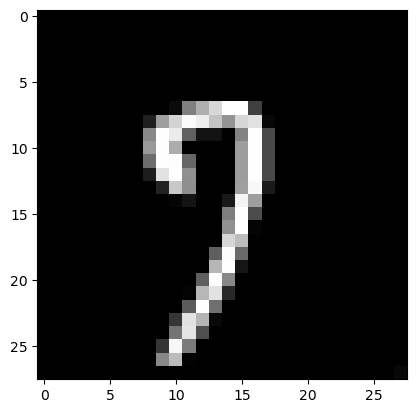

In [36]:
current_image = X_train[:, 4, None]
label = Y_train[4]
print("Label: ", label)
    
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Activation functions

In [37]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

Initialize the layers weights

In [38]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

Forward Propagation

In [39]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [40]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


Backward Propagation

In [41]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

Integrate everything

In [42]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [43]:
W1, b1, W2, b2 = gradient_descent(X_train , Y_train, 0.10, 500)

Iteration:  0
[0 9 9 ... 0 1 9] [1 5 4 ... 1 8 6]
0.09993220338983051
Iteration:  10
[0 5 3 ... 0 4 5] [1 5 4 ... 1 8 6]
0.20667796610169492
Iteration:  20
[0 5 3 ... 1 4 2] [1 5 4 ... 1 8 6]
0.309728813559322
Iteration:  30
[1 5 3 ... 1 3 2] [1 5 4 ... 1 8 6]
0.364
Iteration:  40
[1 5 3 ... 1 3 2] [1 5 4 ... 1 8 6]
0.40323728813559323
Iteration:  50
[1 5 3 ... 1 3 2] [1 5 4 ... 1 8 6]
0.4394406779661017
Iteration:  60
[1 5 4 ... 1 8 2] [1 5 4 ... 1 8 6]
0.48254237288135593
Iteration:  70
[1 5 4 ... 1 8 5] [1 5 4 ... 1 8 6]
0.5259152542372881
Iteration:  80
[1 5 4 ... 1 8 5] [1 5 4 ... 1 8 6]
0.5656610169491525
Iteration:  90
[1 5 4 ... 1 8 5] [1 5 4 ... 1 8 6]
0.6001016949152542
Iteration:  100
[1 5 4 ... 1 8 5] [1 5 4 ... 1 8 6]
0.6298983050847458
Iteration:  110
[1 5 4 ... 1 8 5] [1 5 4 ... 1 8 6]
0.6563220338983051
Iteration:  120
[1 5 4 ... 1 8 6] [1 5 4 ... 1 8 6]
0.6786610169491526
Iteration:  130
[1 5 4 ... 1 8 6] [1 5 4 ... 1 8 6]
0.697135593220339
Iteration:  140
[1 5 4 ... 1

In [44]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


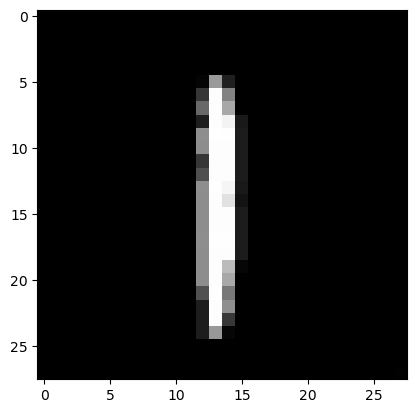

Prediction:  [5]
Label:  5


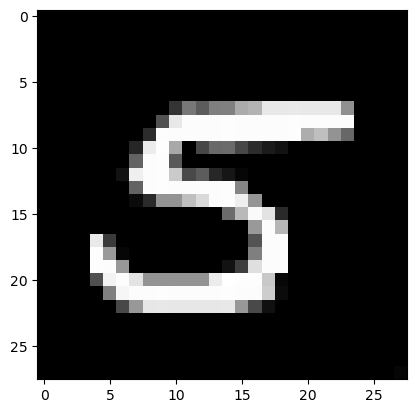

Prediction:  [4]
Label:  4


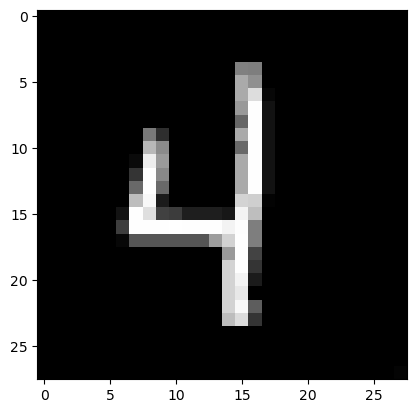

Prediction:  [5]
Label:  5


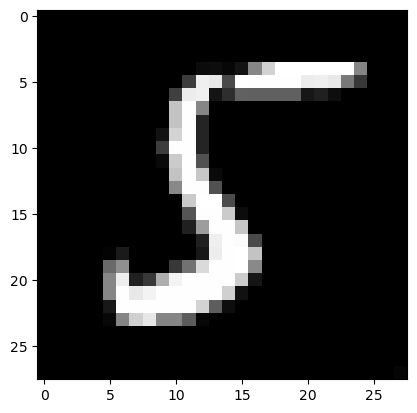

In [45]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [46]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 8 8 1 0 5 7 0 4 2 5 0 5 7 4 8 9 9 5 0 3 8 3 7 7 9 3 4 0 6 7 9 2 4 2 6 1
 3 7 5 1 6 9 9 4 6 8 0 0 9 9 1 3 9 8 4 9 6 9 9 2 4 8 3 8 4 6 8 6 1 3 4 2 5
 6 5 3 7 9 9 7 4 7 7 2 3 5 1 1 8 6 8 7 4 8 9 9 3 3 1 5 0 9 3 8 1 3 6 0 1 5
 3 4 1 1 1 9 6 9 5 1 7 9 1 9 9 7 6 1 4 8 6 2 8 3 7 0 1 4 1 4 1 1 6 2 3 6 0
 1 0 3 2 1 6 3 0 2 4 6 2 2 9 2 9 7 1 7 5 6 5 5 3 8 0 5 9 4 0 6 1 5 7 0 0 4
 1 9 7 6 2 5 3 9 0 7 7 9 3 8 5 6 8 3 9 1 3 1 0 5 0 8 8 8 2 1 7 3 3 5 1 7 4
 1 6 9 8 1 9 2 3 4 7 4 1 8 7 7 9 5 8 2 9 5 6 5 1 1 4 4 4 7 7 3 7 6 9 0 9 7
 4 1 2 9 3 4 4 3 1 2 1 8 5 8 7 9 9 1 3 4 3 4 2 7 5 1 0 1 8 1 8 7 4 2 4 8 0
 7 4 7 9 5 7 2 4 4 8 0 9 0 2 2 3 3 5 3 7 0 8 4 8 5 6 0 4 1 0 3 5 5 4 7 4 8
 7 4 8 5 1 6 0 4 6 7 6 7 2 0 1 9 2 6 4 1 0 1 8 3 6 8 1 3 1 8 9 4 5 2 2 6 2
 2 7 7 2 4 1 5 3 0 7 4 3 2 9 4 1 9 7 7 4 1 7 1 2 3 6 5 8 5 4 7 2 3 4 4 2 0
 3 3 7 3 2 8 5 5 3 5 0 7 0 8 3 4 5 3 4 3 9 7 7 5 4 4 0 4 5 2 2 6 7 3 8 4 1
 8 0 4 8 4 6 8 0 9 5 2 9 3 2 5 5 7 4 2 8 0 1 0 4 1 1 1 1 3 4 1 4 4 7 8 2 2
 8 4 5 4 3 9 1 8 0 9 3 4 

0.84

84% Accuracy

In [ ]:
Save as pickle

In [55]:
import pickle
import random

roll_num = '210260004' # enter ldap
hidden_dim = (10,10) # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': (784,10), # layer 0 weight (784, z)
    'layer_0_bias': (10,1), # layer 0 bias (z, 1)
    'layer_1_wt': (10,10), # layer 1 weight (z, 10)
    'layer_1_bias': (10,1), # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

AttributeError: 'tuple' object has no attribute 'shape'